In [132]:
import os
import cv2
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [133]:
pwd # directory containing the image.

'/home/sourabh/Documents/ML_dobara_se'

In [134]:
item = os.listdir()[0] # item = image.

In [135]:
image = cv2.imread(item) # reading image in array form.
img_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # converting default BGR format of cv2 into RGB.

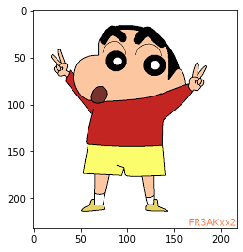

In [136]:
plt.imshow(img_rgb) # original image.

In [137]:
frame = cv2.resize(img_rgb, (64, 64), interpolation=cv2.INTER_AREA) # resizing the image (64 x 64).

In [138]:
frame.shape, type(frame)

((64, 64, 3), numpy.ndarray)

In [139]:
# resizing to shape(frame.shape[0] * frame.shape[1],3)
img = frame.reshape((-1, 3)) # list of image pixels.

In [140]:
img.shape # now its like 4096 rows and 3 columns [ 2D data ].

(4096, 3)

In [141]:
# clustering.
clt = KMeans(n_clusters=7) # value of k determines the diff colors in given image.
# labeling.
labels = clt.fit_predict(img_list)

In [142]:
# this function converts the rgb color code to hex code. 
def rgb2hex(rgb): # here is the list : [R,G,B]
    hex = "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))
    return hex

In [143]:
# ex:-
rgb2hex([2,2,255])

'#0202ff'

In [144]:
count_labels = Counter(labels) # making a dictionary of frequency of labels [using labels as primary keys].
sum_count = sum(count_labels.values())

In [145]:
center_colors = list(clt.cluster_centers_)
ordered_colors = [center_colors[i]/255 for i in count_labels.keys()]
color_labels = [rgb2hex(ordered_colors[i]*255) for i in count_labels.keys()]

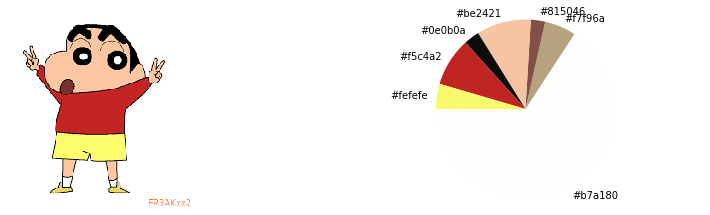

In [147]:
    # plotting input image.
    plt.figure(figsize=(14, 8))
    plt.subplot(221)
    plt.imshow(img_rgb)
    plt.axis('off')
    # plotting color pie chart.
    plt.subplot(222)
    plt.pie(count_labels.values(), labels=color_labels, colors=ordered_colors, startangle=180)
    plt.axis('equal')
    plt.show()